# Einstieg Visualisierungen mit Matplotlib

Je umfangreicher tabellarisch organisierte Datensammlungen aber werden, desto unübersichtlicher
werden sie auch; die Methode der Datenvisualisierung kann uns dabei helfen, einen raschen Überblick über komplexe Wertverteilungen zu erhalten. 

Über Graphen, Diagramme oder Karten ermöglicht sie uns die Identifikation von Ausreißern, Mustern oder auch Trends. Es handelt sich um einen eigenen Forschungsbereich, den wir hier leider nur anreißen können, aber so viel sei gesagt: Effektive Datenvisualisierungen sind eine Wissenschaft für sich und das richtige Maß zwischen Form und Funktion zu finden, stellt nicht selten eine Herausforderung dar. Alles an einer Visualisierung sollte einem Zweck folgen: die Auswahl des Visualisierungstyps sollte zu den Informationen passen (Linien- oder Balkendiagramm, Heatmap, Histogramm, ...) und Farben, Ausrichtungen, Positionen und Formen einen Aussagewert haben.

Um uns an diesen Bereich heranzutasten, werden wir erst einmal mit der für Python grundlegenden und vielfältigen Bibliothek [**Matplotlib**](https://matplotlib.org/) arbeiten. Sie wurde 2003 erstmals als plattformübergreifendes Visualisierungs-Paket veröffentlicht und wird von Pandas standardmäßig aufgerufen, wenn auf Basis der Pandas-Objekte Visualisierungen erstellt werden sollen. Auf der Website der Bibliothek finden Sie zahlreiche nützliche Tutorials für verschiedene Visualisierungsformen: https://matplotlib.org/tutorials/index.html.

## Import

Zunächst importieren wir die benötigten Python-Bibliotheken. Neben pandas nutzen wir nun auch Matplotlib. 

Wichtig! Damit die Diagramme in Jupyter Notebooks angezeigt werden, muss der Magic-Commant `%matplotlib inline ausgeführt` werden.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Einfacher Linienplot

Nutzer:innen können mit Matplotlib zwei leicht unterschiedliche Wege wählen, um  verschiedene Diagrammtypen zu plotten. Wir werden hier kurz beide Varianten vorstellen, werden aber im Weitern die zuerst dargestellte Option durchgängig nutzen, da diese aus unserer Sicht mehr Flexibilität bietet. Wir nutzen `fig, ax`, um zunächst eine *figure* anzulegen, auf der dann unterschiedliche Bereiche *axes* als *subplots* angelegt werden können. Die zweite Variante nutzt mit `plt` zusammen mit der entsprechenden Methoden einen etwas einfacheren, direkteren Weg - bietet aber nicht alle Möglichkeiten, um z.B. mehrere Plots in einer Grafik zu platzieren.

Grundsätzlich brauchen wir immer Werte für die x-Achse und die gleiche Anzahl an Werten für die y-Achse. Diese Werte werden in Form von Listen der `plot()` Methode übergeben. In unserem Beispiel und der Variante, die wir weiter nutzen wollen, nutzen wir dies auf dem `ax`-Objekt. Davor haben wir aber die *figure* und eine *axes* mit `plt.subplots()` angelegt. Mit der letzten Zeile lassen wir die Grafik anzeigen. 

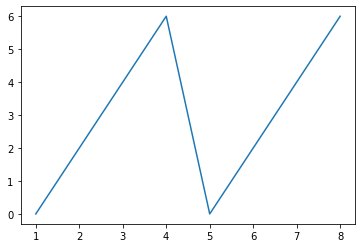

In [6]:
x = [ 1, 2, 3, 4, 5, 6, 7, 8 ]
y = [ 0, 2, 4, 6, 0, 2, 4, 6 ]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Hier nun die gleiche Grafik mit der anderen 'Schreibvariante', auf die Sie sicherlich auf treffen werden.

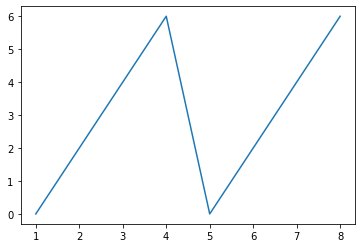

In [9]:
plt.figure()
plt.plot(x, y)
plt.show()

## Balkendiagramm und Tortendiagramm 

Wir nutzen die Daten der Wahlergebnisse der Wahlen zum Ersten Deutschen Bundestag 1949, um ein typisches Balkendiagramm und ein Tortendiagramm zu visualisieren. Wir werden die Grafik direkt mit Beschriftungen versehen. Zunächst wiederholen wir aber ein wenig die Funktionalitäten von pandas, indem wir die Daten in einen Dataframe bringen.

Datenquelle: https://www.bundeswahlleiterin.de/bundestagswahlen/1949.html

In [8]:
# Erzeugung von Beispieldaten: Wahl zum 1. Deutschen Bundestag am 14. August 1949

votes_dict = {'Parteien':['SPD', 'CDU', 'FDP', 'CSU', 
                        'KPD', 'Parteilose', 'BP', 'DP', 
                        'Zentrum', 'Sonstige'],
                'Stimmen':[6934975, 5978636, 2829920, 1380448,
                           1361706, 1141647, 986478, 939934, 
                           727505, 1451149],
                'Prozent': [29.2, 25.2, 11.9, 5.8, 5.7, 
                            4.8, 4.2, 4.0, 3.1, 6.1],
                'color': ['red', 'black', 'yellow', 'darkblue', 
                          'darkred', 'orange', 'blue', 'grey',
                          'darkgrey', 'darkorange']
             }

df_vote = pd.DataFrame(votes_dict,                                   # Übergabe der Daten
                          columns=['Stimmen', 'Prozent', 'color'],   # Spezifikation der Spalten
                          index=votes_dict['Parteien'])              # Spezifikation des Index
df_vote

,Stimmen,Prozent,color
SPD,6934975,29.2,red
CDU,5978636,25.2,black
FDP,2829920,11.9,yellow
CSU,1380448,5.8,darkblue
KPD,1361706,5.7,darkred
Parteilose,1141647,4.8,orange
BP,986478,4.2,blue
DP,939934,4.0,grey
Zentrum,727505,3.1,darkgrey
Sonstige,1451149,6.1,darkorange


Nun erstellen wir aus den Daten ein Balkendiagramm - allerdings noch ohne Beschriftung.

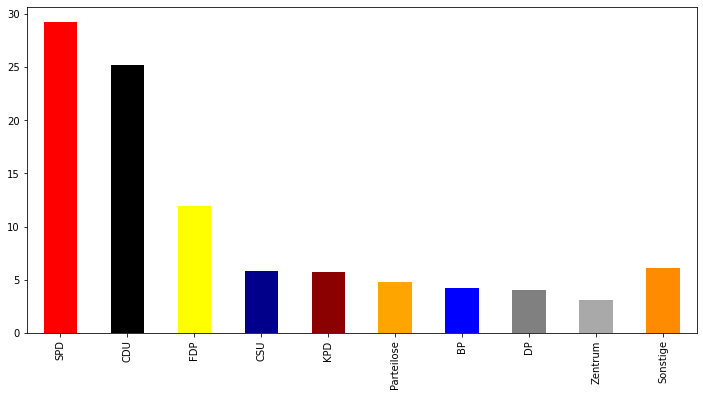

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

df_vote.loc[:, 'Prozent'].plot(kind='bar', 
                               color=df_vote.loc[:, 'color'],
                               ax=ax);

Mit einer kleinen Änderung im Code können wir ein Tortendiagramm erzeugen.

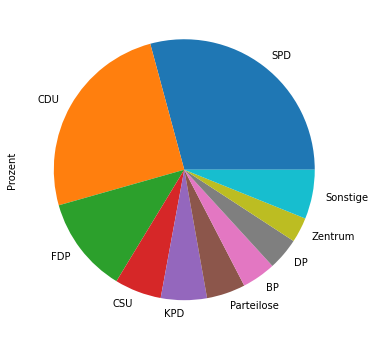

In [35]:
fig, ax = plt.subplots(figsize=(12,6))

df_vote.loc[:, 'Prozent'].plot(kind='pie',
                               ax=ax);

Schließlich ergänzen wir Beschriftung und Formatierungen bei dem Balkendiagramm. Matplotlib bietet eine Fülle von Möglichkeiten, die Visualisierungen nach eigenen Wünschen und Bedarfen anzupassen. Ein Blick in die [Dokumentation](https://matplotlib.org/stable/api/index.html) hilft hier weiter und viele Anregungen zur Ausgestaltung von Visualisierungen erhält man über die Beispiel in der [Matpltolib-Galerie](https://matplotlib.org/stable/gallery/index.html)

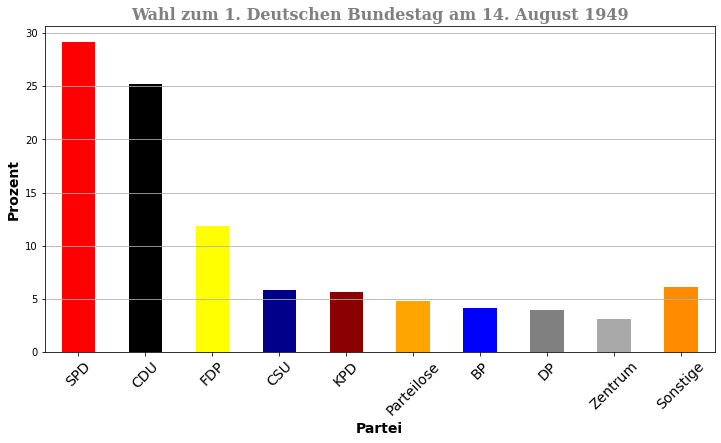

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

df_vote.loc[:, 'Prozent'].plot(kind='bar', 
                               color=df_vote.loc[:, 'color'],
                               ax=ax)

# Formatierung der Überschrift des Diagramms
ax.set_title(label='Wahl zum 1. Deutschen Bundestag am 14. August 1949',
             family='serif',
             color='grey',
             weight='semibold',
             size=16
             )

# Formatierung und Beschriftung von x-Achse und y-Achse
ax.set_xlabel('Partei',
              weight='bold',
              size=14
             )

ax.set_ylabel('Prozent',
              size=14,
              weight='bold',
             )

# Beschriftung der Labelnamen vergrößern und rotieren
ax.set_xticklabels(df_vote.index, 
                   size=14,
                   rotation=45)

# Zeichnen nur der Gitterlinien der y-Achse
ax.yaxis.grid(True)

plt.show()